In [22]:
import pandas as pd #helps in importing external files to python 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [24]:
# Read in CSV files
brands = pd.read_csv("brands.csv")
categories = pd.read_csv("categories.csv")
customers = pd.read_csv("customers.csv")
order_items = pd.read_csv("order_items.csv")
orders = pd.read_csv("orders.csv")

In [26]:
products = pd.read_csv("products.csv")
stocks = pd.read_csv("stocks.csv")
stores = pd.read_csv("stores.csv")
staffs = pd.read_csv("staffs.csv")


In [28]:
# Create database connection
connection = sqlite3.connect(r"C:\Users\ADITYA\Downloads\bike_store (1).db")

In [32]:
order_items.to_sql('order_items', connection, if_exists='replace', index=False)
orders.to_sql('orders', connection, if_exists='replace', index=False)

1615

In [34]:
# Insert data into database

brands.to_sql("brands", connection, if_exists = "replace", index = False)
categories.to_sql("categories", connection, if_exists = "replace", index = False)
customers.to_sql("customers", connection, if_exists = "replace", index = False)
order_items.to_sql("orders_items", connection, if_exists = "replace", index = False)
orders.to_sql("orders", connection, if_exists = "replace", index = False)
products.to_sql("products", connection, if_exists = "replace", index = False)
staffs.to_sql("staffs", connection, if_exists = "replace", index = False)
stores.to_sql("stores", connection, if_exists = "replace", index = False)
stocks.to_sql("stocks", connection, if_exists = "replace", index = False)

939

### Data Diagram

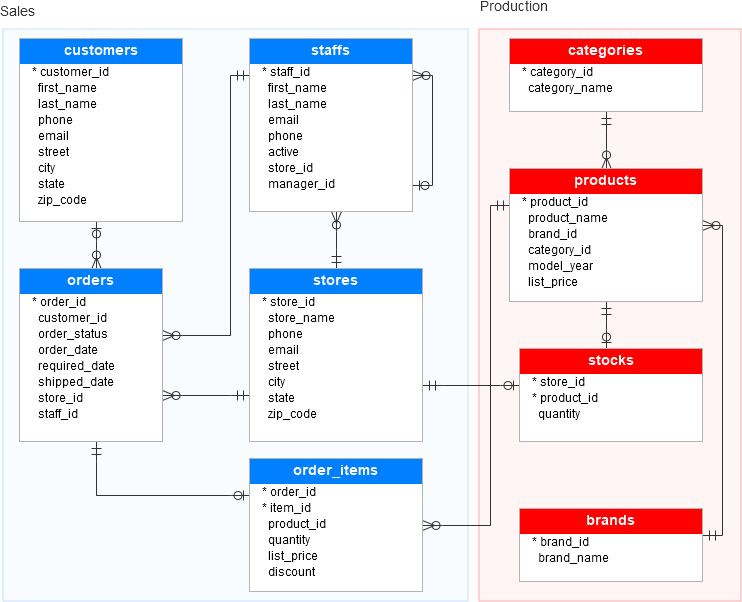

# I. Beginner

## SELECT & FROM
`SELECT` and `FROM` are the 2 minimum components we need to build a query in SQL. `SELECT` defines what columns we would like, and `FROM` defines the table we would like to pull data from.

In [ ]:
# Run SQL query and load results into a DataFrame
query = """
SELECT 
    category_name 
FROM 
    categories;
"""

df = pd.read_sql_query(query, connection)
df

We can also use `SELECT *` to select all the columns in a table. Be careful when using this with large tables, as it will return all columns and rows for a table. It is advisable to specify the columns you would like and/or use this with `LIMIT` to avoid issues.

In [ ]:
query = """
SELECT 
    * 
FROM 
    categories;
"""

df = pd.read_sql_query(query, connection)
df

## ORDER BY, DISTINCT, LIMIT
`ORDER BY` allows us to order the output of the query by 1 or more columns. 

select upper(concat(first_name, ' ' , last_name))   'Customer Name'
from customers;

In [11]:
query = """
SELECT first_name || ' ' || last_name AS full_name
FROM customers;
"""

df = pd.read_sql_query(query, connection)
df

#SELECT CONCAT(first_name, ' ', last_name) AS full_name from customers;

,first_name,last_name
0,Jamika,Acevedo
1,Penny,Acevedo
2,Ester,Acevedo
3,Shery,Acosta
4,Bettyann,Acosta
...,...,...
1440,Edda,Young
1441,Jasmin,Young
1442,Jayme,Zamora
1443,Alexandria,Zamora


In [12]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
ORDER BY
    last_name, first_name;
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Ester,Acevedo
1,Jamika,Acevedo
2,Penny,Acevedo
3,Bettyann,Acosta
4,Shery,Acosta
...,...,...
1440,Edda,Young
1441,Jasmin,Young
1442,Alexandria,Zamora
1443,Jayme,Zamora


We can use `ASC` (Ascending) or `DESC` (Descending) to change the order used by `ORDER BY`.

`DISTINCT` will return only the unique values in a column, or the unique rows in the case of multiple columns. Below we use `DISTINCT` with last_name to get unique last names, but if we were to add first_name, it would give us all of the unique last_name - first_name pairs.

In [13]:
query = """
SELECT 
    DISTINCT
    last_name
FROM 
    customers
ORDER BY 
    last_name DESC;
"""

df = pd.read_sql_query(query, connection)
df

,last_name
0,Zimmerman
1,Zamora
2,Young
3,Yates
4,Yang
...,...
748,Aguilar
749,Adkins
750,Adams
751,Acosta


`LIMIT` allows us to limit the number of output rows. This is useful when dealing with large tables where we only need to see the columns, for example.

In [14]:
query = """
SELECT 
    DISTINCT
    last_name
FROM 
    customers
ORDER BY 
    last_name ASC
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,last_name
0,Acevedo
1,Acosta
2,Adams
3,Adkins
4,Aguilar


## WHERE, AND, OR
`WHERE` filters columns based on a conditional statement. This can be done with both numeric and text data.

In [15]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
WHERE
    last_name = 'Acevedo' 
ORDER BY 
    first_name;
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Ester,Acevedo
1,Jamika,Acevedo
2,Penny,Acevedo


We can add multiple conditions using `AND` and `OR`. When using multiple conditions, be sure that your logical statements are being properly interpreted. It is often useful to use parentheses to properly separate statements.

In [16]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
WHERE
    last_name = 'Acevedo'
AND
    first_name = 'Ester';
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Ester,Acevedo


Note the difference in output between the 2 queries below.

In [17]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
WHERE
    last_name = 'Acevedo'
AND
    first_name = 'Ester'
OR
    first_name = 'Jamika';
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Jamika,Acevedo
1,Jamika,Blanchard
2,Ester,Acevedo


In [18]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
WHERE
    last_name = 'Acevedo'
AND
    (
    (first_name = 'Ester')
    OR 
    (first_name = 'Jamika')
    );
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Jamika,Acevedo
1,Ester,Acevedo


## IN, IS NULL, NOT
We can use `IN` within a conditional clause like `WHERE` or `AND` to filter a column based on whether or not it contains certain values. Here we will select all customers from New York and California only.

In [19]:
query = """
SELECT 
    *
FROM 
    customers
WHERE0
    state IN ('CA', 'NY')
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820


We can use `IS NULL` to filter columns that have null values. Let's add this to the previous query to filter down to users with no phone number on file.

In [20]:
query = """
SELECT 
    *
FROM 
    customers
WHERE
    state IN ('CA', 'NY')
AND 
    phone IS NULL
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,6,Lyndsey,Bean,None,lyndsey.bean@hotmail.com,769 West Road,Fairport,NY,14450


We can use `NOT` to reverse the logic of these, `NOT IN` and `IS NOT NULL` respectively, to get customers who are not in Texas or New York, and who do have a phone number.

In [21]:
query = """
SELECT 
    *
FROM 
    customers
WHERE
    state NOT IN ('CA', 'NY')
AND 
    phone IS NOT NULL
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,43,Mozelle,Carter,(281) 489-9656,mozelle.carter@aol.com,895 Chestnut Ave.,Houston,TX,77016
1,56,Lolita,Mosley,(281) 363-3309,lolita.mosley@hotmail.com,376 S. High Ridge St.,Houston,TX,77016
2,123,Robena,Hill,(361) 598-4414,robena.hill@hotmail.com,263 Cross St.,Corpus Christi,TX,78418
3,135,Dorthey,Jackson,(281) 926-8010,dorthey.jackson@msn.com,9768 Brookside St.,Houston,TX,77016
4,203,Minerva,Decker,(281) 271-6390,minerva.decker@yahoo.com,794 Greenrose Street,Houston,TX,77016


## LIKE
`LIKE` can be used to match patterns in text columns. This is done mainly with the `%` and `_` operators.

`%` is used to match any sequence of 0 or more characters, while `_` matches any single character. This can be used to find entries that start with, end with, or contain certain text.

In [22]:
query = """
SELECT 
    *
FROM 
    products
WHERE
    product_name LIKE 'T%'
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
2,7,Trek Slash 8 27.5 - 2016,9,6,2016,3999.99
3,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016,1799.99
4,9,Trek Conduit+ - 2016,9,5,2016,2999.99


## Aggregate Functions
SQL functions are built-in operations that allow you to manipulate data, perform calculations, and retrieve information from the database. **Aggregate functions** perform calculations on sets of values and return a single value. The most commonly used aggregate functions include `SUM()`, `AVG()`, `COUNT()`, `MIN()`, and `MAX()`.

Let's find the most expensive item purchased and the total items ordered using these.

In [23]:
query = """
SELECT 
    *,
    MAX(list_price)
FROM 
    order_items;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,item_id,product_id,quantity,list_price,discount,MAX(list_price)
0,1364,2,155,2,11999.99,0.1,11999.99


The automatic name given to columns that result from functions are not always clear, so let's use `AS` to rename the column for our total order count query.

In [24]:
query = """
SELECT 
    SUM(quantity) AS total_items_ordered --alias
FROM 
    order_items;
    """
#alias
df = pd.read_sql_query(query, connection)
df

,total_items_ordered
0,7078


## Arithmetic Operators
**Arithmetic operators** are used to perform mathematical calculations on numeric values.

1. **Addition (`+`):** Adds two numeric values together.
2. **Subtraction (`-`):** Subtracts one numeric value from another.
3. **Multiplication (`*`):** Multiplies two numeric values.
4. **Division (`/`):** Divides one numeric value by another.
5. **Modulus (`%`):** Returns the remainder after division.
6. **Unary Minus (`-`):** Negates a numeric value (changes its sign).

Let's take the average of the list price multiplied by the discount in the order_items table to see the average discount in dollars.

In [25]:
query = """
SELECT 
    AVG(list_price * discount) AS avg_discount_usd
FROM 
    order_items;
"""

df = pd.read_sql_query(query, connection)
df

,avg_discount_usd
0,126.698149


## Comparison Operators
**Comparison operators** are used to compare values and return a true or false result. We already learned one of these earlier, `=`, when using `WHERE`.

1. **Equal to (`=`):** Checks if two values are equal.
2. **Not equal to (`!=` or `<>`):** Checks if two values are not equal.
3. **Greater than (`>`):** Checks if one value is greater than another.
4. **Less than (`<`):** Checks if one value is less than another.
5. **Greater than or equal to (`>=`):** Checks if one value is greater than or equal to another.
6. **Less than or equal to (`<=`):** Checks if one value is less than or equal to another.

Let's expand on the last example and find the average final sale price for items priced at least at $1,000. 

We can use the `ROUND` function here to round our output to 2 decimal places, since we are dealing with dollars.

In [26]:
query = """
SELECT 
    ROUND(AVG(list_price * (1 - discount)), 2) AS avg_saleprice_usd
FROM 
    order_items
WHERE
    list_price >= 1000;
"""

df = pd.read_sql_query(query, connection)
df

,avg_saleprice_usd
0,2542.02


## GROUP BY & HAVING
`GROUP BY` divides the rows returned from the `SELECT` statement into 1 or more groups. What makes this so powerful is that you can apply an aggregate function like `SUM()` to each group. This is often used to aggregate data by unique identifiers, time periods, categories, and more.

top n orderid's - based on total sale price

In [27]:
query = """
SELECT 
    order_id,
    ROUND(SUM(quantity * list_price * (1 - discount)), 2) as final_sale_price
FROM 
    order_items
GROUP BY
    order_id order by 2 desc;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,final_sale_price
0,1541,29147.03
1,937,27050.72
2,1506,25574.96
3,1482,25365.43
4,1364,24890.62
...,...,...
1610,1176,170.99
1611,1098,170.99
1612,854,170.99
1613,916,167.99


`HAVING` functions like `WHERE`, except that it is used to filter on aggregated values such as those output by `SUM()` etc.

Let's use it in the same query above, to include only final sale prices greater than $20,000.

In `ORDER BY` and `GROUP BY` clauses, we can use positional references like 1 in place of the column name for better readability and ease of writing. The order is determined by the order of columns in the `SELECT` clause.

list_price - MRP
discount - perct dis
quantity - 


Final Sales - 

1   100 0.1 2   =  round(100*(0.9)*2,2) = 180
1   50  0.1 4   =  round(50(1-0.1)*4,2) = 180
2                                         100
2                                          80
sum(180+180) = 360 
sum(100+80) = 180


In [22]:
query = """
SELECT 
    order_id,
    ROUND(SUM(quantity * list_price * (1 - discount)), 2) final_sale_price
FROM 
    order_items
GROUP BY
    1
HAVING
    final_sale_price > 20000
ORDER BY
    2 DESC;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,final_sale_price
0,1541,29147.03
1,937,27050.72
2,1506,25574.96
3,1482,25365.43
4,1364,24890.62
5,930,24607.03
6,1348,20648.95
7,1334,20509.43
8,973,20177.75


# II. Intermediate

## CASE & CAST
We can use `CASE` to create new columns based on certain conditions. `WHEN` specifies the condition, `THEN` specifies the output when the condition is true, and `ELSE` specifies the output when the condition is false.

`CASE` is often used to create categories for existing columns, deal with NULL values, and within aggregate functions to perform conditional aggregation.

In [23]:
query = """
SELECT 
    *, 
    CASE WHEN shipped_date > required_date THEN 1
         ELSE 0
         END AS 'shipped_late'
FROM 
    orders
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,shipped_late
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,0
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6,0
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7,0
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3,1
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6,0


`CAST` is used to change the data type of a column. This will be especially important later in this section when we perform joins, since the two columns being joined need to have the same data type.

In [24]:
query = """
SELECT 
    order_id,
    CAST(order_id AS float) AS order_id_float
FROM 
    orders
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,order_id_float
0,1,1.0
1,2,2.0
2,3,3.0
3,4,4.0
4,5,5.0


## INNER JOIN
In a relational database, data is typically distributed across multiple tables, as is the case with our sample database. To select complete data, you often need to query and combine data from multiple tables. We do this by using various table joins.

For joins to be possible, the tables in question must both share a column such as order_id. The query will then find the rows in both tables where the values are equal and join them.

An `INNER JOIN` keeps only the rows that have a match in both tables.

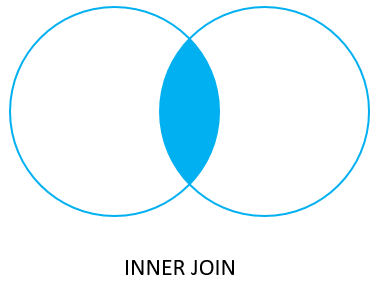

Let's join the orders table with the customers table as an example.

In [36]:
query = """
SELECT 
    customers.customer_id, customers.first_name || ' ' || last_name AS full_name, customers.phone, customers.email, customers.street,
    customers.city,customers.state, customers.zip_code,orders.order_status, orders.order_date,orders.required_date,orders.shipped_date
FROM 
    customers
INNER JOIN
    orders
ON
    orders.customer_id = customers.customer_id
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,full_name,phone,email,street,city,state,zip_code,order_status,order_date,required_date,shipped_date
0,1,Debra Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127,1,2018-04-18,2018-04-18,None
1,1,Debra Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127,3,2018-11-18,2018-11-18,None
2,1,Debra Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127,4,2016-12-09,2016-12-10,2016-12-12
3,2,Kasha Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008,1,2018-04-09,2018-04-09,None
4,2,Kasha Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008,3,2017-02-05,2017-02-05,None


In [38]:
merged_df=pd.merge(customers,orders,on='customer_id',how='inner')
merged_df['full_name']=merged_df['first_name'] + ' ' + merged_df['last_name']
merged_df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code,order_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,full_name
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127,599,4,2016-12-09,2016-12-10,2016-12-12,2,6,Debra Burks
1,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127,1555,1,2018-04-18,2018-04-18,NaN,2,7,Debra Burks
2,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127,1613,3,2018-11-18,2018-11-18,NaN,2,6,Debra Burks
3,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008,692,3,2017-02-05,2017-02-05,NaN,1,3,Kasha Todd
4,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008,1084,4,2017-08-21,2017-08-24,2017-08-23,1,2,Kasha Todd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301,1366,4,2018-01-26,2018-01-27,2018-01-28,2,6,Jamaal Morrison
1611,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201,1036,4,2017-07-30,2017-08-01,2017-07-31,2,6,Cassie Cline
1612,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722,558,4,2016-11-15,2016-11-16,2016-11-17,2,7,Lezlie Lamb
1613,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424,616,4,2016-12-20,2016-12-23,2016-12-23,2,6,Ivette Estes


If a customer_id was present in the orders table but not in the customer table, that row would be excluded. The opposite is true as well, if a customer_id was present in the customers table but not in the orders table, that customer's information would be excluded from the final output.

## LEFT JOIN
A `LEFT JOIN` works similarly to an `INNER JOIN`, except that it keeps all the records in the first table, even if there is no match. In the case of no match the data for the columns in the right table are filled with NULL values.

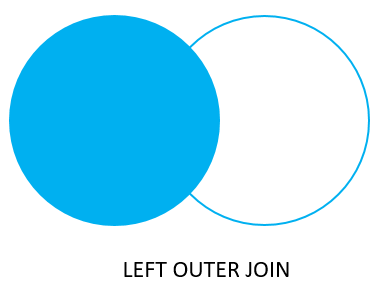

In [40]:
query = """
SELECT 
    *
FROM 
    orders
LEFT JOIN
    customers
ON
    orders.customer_id = customers.customer_id
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,259,Johnathan,Velazquez,None,johnathan.velazquez@hotmail.com,9680 E. Somerset Street,Pleasanton,CA,94566
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6,1212,Jaqueline,Cummings,None,jaqueline.cummings@hotmail.com,478 Wrangler St.,Huntington Station,NY,11746
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7,523,Joshua,Robertson,None,joshua.robertson@gmail.com,81 Campfire Court,Patchogue,NY,11772
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3,175,Nova,Hess,None,nova.hess@msn.com,773 South Lafayette St.,Duarte,CA,91010
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6,1324,Arla,Ellis,None,arla.ellis@yahoo.com,127 Crescent Ave.,Utica,NY,13501


Now, unlike in the `INNER JOIN`, if a customer_id was present in the orders table but not in the customers table, the rows in orders containing that id would be included in the final output.

## FULL OUTER JOIN
A `FULL OUTER JOIN` includes all the rows from both tables, even if there is no match. Like the `LEFT JOIN`, when there is no match for a row the data from the other table is filled with NULL values for that row.

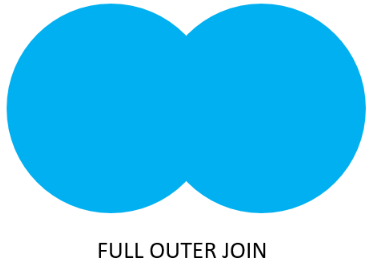

In [40]:
query = """
SELECT 
    *
FROM 
    orders
FULL JOIN
    customers
ON
    orders.customer_id = customers.customer_id
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,259,Johnathan,Velazquez,None,johnathan.velazquez@hotmail.com,9680 E. Somerset Street,Pleasanton,CA,94566
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6,1212,Jaqueline,Cummings,None,jaqueline.cummings@hotmail.com,478 Wrangler St.,Huntington Station,NY,11746
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7,523,Joshua,Robertson,None,joshua.robertson@gmail.com,81 Campfire Court,Patchogue,NY,11772
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3,175,Nova,Hess,None,nova.hess@msn.com,773 South Lafayette St.,Duarte,CA,91010
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6,1324,Arla,Ellis,None,arla.ellis@yahoo.com,127 Crescent Ave.,Utica,NY,13501


Again, here all the rows from both orders and customers would be included, even where there was no match.

## SELF JOIN
A **SELF JOIN** is a regular join that joins a table to itself. Typically, these are used to query hierarchical data or to compare rows within the same table.

To create a SELF JOIN, you use the same table twice with different table aliases.

One example of where you can apply a SELF JOIN is pulling the most recent and second most recent purchase dates for customers with at least 2 orders. A more complex version of this could be used to calculate the average days between transactions, which is often used to segment customers in e-commerce.

In [42]:
query = """
SELECT 
    t1.customer_id,
    MAX(t1.order_date) most_recent_order,
    MAX(t2.order_date) second_most_recent_order
FROM 
    orders t1
INNER JOIN
    orders t2
ON 
    t1.customer_id = t2.customer_id
AND
    t1.order_date > t2.order_date
GROUP BY
    1;
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,most_recent_order,second_most_recent_order
0,1,2018-11-18,2018-04-18
1,2,2018-04-09,2017-08-21
2,3,2018-10-21,2018-04-06
3,4,2018-04-18,2017-11-21
4,5,2018-04-17,2016-11-24
...,...,...,...
126,231,2018-04-26,2017-12-14
127,233,2018-04-13,2017-06-03
128,237,2018-04-08,2016-04-11
129,239,2018-04-29,2017-08-09


In [68]:
query="""WITH RecentOrders AS (SELECT t1.customer_id,MAX(t1.order_date) AS most_recent_order,MAX(t2.order_date) AS second_most_recent_order
FROM orders t1 INNER JOIN orders t2 ON t1.customer_id = t2.customer_id
WHERE t1.order_date > t2.order_date
GROUP BY t1.customer_id
)
SELECT customer_id,most_recent_order,second_most_recent_order, julianday(most_recent_order) - julianday(second_most_recent_order) AS days_between_orders
FROM RecentOrders
WHERE second_most_recent_order IS NOT NULL;
"""
df = pd.read_sql_query(query, connection)
df                                            #sqlite - julianday for finding the difference between 2 dates - julianday is an inbuilt function usedtoconvert a date ot DateTime string into a julianday number (We count the continuous number of days from Jan 1st, 4713 BC)
                                              #mysql - DATEDIFF for finding the difference between 2 dates

,customer_id,most_recent_order,second_most_recent_order,days_between_orders
0,1,2018-11-18,2018-04-18,214.0
1,2,2018-04-09,2017-08-21,231.0
2,3,2018-10-21,2018-04-06,198.0
3,4,2018-04-18,2017-11-21,148.0
4,5,2018-04-17,2016-11-24,509.0
...,...,...,...,...
126,231,2018-04-26,2017-12-14,133.0
127,233,2018-04-13,2017-06-03,314.0
128,237,2018-04-08,2016-04-11,727.0
129,239,2018-04-29,2017-08-09,263.0


In [78]:
query = """select JULIANDAY('2023-08-01') - JULIANDAY('2023-07-01') AS days_difference;"""
pd.read_sql_query(query, connection)

,days_difference
0,31.0


## UNION
With joins, we have been combining data horizontally, but with `UNION` we combine it vertically. `UNION` combines the results of 2 or more `SELECT` statements.

The conditions for this are that the number, order, and data types of the columns are the same. `UNION` removes duplicate rows. In the case you wish to keep these `UNION ALL` should be used instead.

As an example, let's pretend that our store has an extremely large product catalog, and keeps their products in different tables separated by year. We want to get the products for 2016 and 2019, so we can use `UNION` to combine the results.

In [44]:
query = """
SELECT 
    product_id,
    product_name,
    model_year,
    list_price
FROM 
    products
WHERE
    model_year = 2016
UNION
SELECT 
    product_id,
    product_name,
    model_year,
    list_price
FROM 
    products
WHERE
    model_year = 2019;
"""

df = pd.read_sql_query(query, connection)
df

,product_id,product_name,model_year,list_price
0,1,Trek 820 - 2016,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,2016,749.99
2,3,Surly Wednesday Frameset - 2016,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,2016,1320.99
5,6,Surly Ice Cream Truck Frameset - 2016,2016,469.99
6,7,Trek Slash 8 27.5 - 2016,2016,3999.99
7,8,Trek Remedy 29 Carbon Frameset - 2016,2016,1799.99
8,9,Trek Conduit+ - 2016,2016,2999.99
9,10,Surly Straggler - 2016,2016,1549.00


## Subquery
**Subqueries** are queries nested within our main query. This is useful when we want to use the output of 1 query to filter another or calculate values based on a subset of data.

One example is if we want to see 2019 products with an above average price.

In [30]:
query = """
SELECT 
    *
FROM 
    products
WHERE
    model_year = 2019
AND
    list_price > (
                  SELECT
                      AVG(list_price)
                  FROM
                      products
                  WHERE
                      model_year = 2019
                 );
"""

df = pd.read_sql_query(query, connection)
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
1,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99
2,321,Trek Checkpoint ALR Frameset - 2019,9,7,2019,3199.99


In [54]:
query = """with avg_price_2019 AS (
    select avg(list_price) AS avg_price
    from products
    where model_year = 2019
)

select *
from products
cross join avg_price_2019
where 
    model_year = 2019
    AND list_price > avg_price;
    """

df = pd.read_sql_query(query, connection)
df

,product_id,product_name,brand_id,category_id,model_year,list_price,avg_price
0,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99,2583.323333
1,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99,2583.323333
2,321,Trek Checkpoint ALR Frameset - 2019,9,7,2019,3199.99,2583.323333


In [60]:
query = """with avg_price_2019 as (
     select avg(list_price) as avg_price 
     from products 
     where model_year= 2019
)
select * 
from products 
CROSS JOIN avg_price_2019 
where 
    model_year=2019 and list_price> avg_price;
"""

df = pd.read_sql_query(query, connection)
df

,product_id,product_name,brand_id,category_id,model_year,list_price,avg_price
0,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99,2583.323333
1,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99,2583.323333
2,321,Trek Checkpoint ALR Frameset - 2019,9,7,2019,3199.99,2583.323333


In [64]:
query="""with avg_price_2019 as (select avg(list_price) as avg_price from products where model_year= 2019) select * from products,  avg_price_2019 where model_year=2019 and list_price> avg_price_2019.avg_price"""

df = pd.read_sql_query(query, connection)
df

,product_id,product_name,brand_id,category_id,model_year,list_price,avg_price
0,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99,2583.323333
1,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99,2583.323333
2,321,Trek Checkpoint ALR Frameset - 2019,9,7,2019,3199.99,2583.323333


`IN` can also be used to filter the outer query when using the inner(sub-query) query. Here we will use a subquery that returns order ids for the Trek brand that were discounted at least 20%, and use that to filter orders and return the unique order_id and customer_id for orders with those conditions. 

Note here that `DISTINCT` returns unique pairs of order_id and customer_id, so there will be duplicate customer ids for customers with more than 1 order.

In [14]:
query = """
SELECT 
    DISTINCT
    order_id,
    customer_id
FROM 
    orders
WHERE
    order_id IN (
                  SELECT
                      DISTINCT
                      order_id
                  FROM
                      order_items
                  INNER JOIN
                      products
                  ON
                      order_items.product_id = products.product_id
                  AND
                      brand_id = 9
                  AND
                      discount >= .20
                 );
"""

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id
0,1,259
1,16,552
2,19,696
3,28,252
4,29,437
...,...,...
293,1601,43
294,1602,55
295,1605,123
296,1610,15


In [82]:
query = """
SELECT
                      DISTINCT
                      order_id
                  FROM
                      order_items
                  INNER JOIN
                      products
                  ON
                      order_items.product_id = products.product_id
                  AND
                      brand_id = 9
                  AND
                      discount >= .20;
                 
"""

df = pd.read_sql_query(query, connection)
df

,order_id
0,1
1,45
2,48
3,94
4,128
...,...
293,1381
294,1602
295,1485
296,1391


In [17]:
query = "PRAGMA table_info(products);"
pd.read_sql_query(query, connection)


,cid,name,type,notnull,dflt_value,pk
0,0,product_id,INTEGER,0,None,0
1,1,product_name,TEXT,0,None,0
2,2,brand_id,INTEGER,0,None,0
3,3,category_id,INTEGER,0,None,0
4,4,model_year,INTEGER,0,None,0
5,5,list_price,REAL,0,None,0


## EXISTS
`EXISTS` checks if there are any rows present in a subquery, and returns true if the subquery either returns rows or returns NULL. This can be used with `NOT` to achieve the opposite effect.
To achieve this a column in the subquery needs to be matched with a column in the main query; this is known as a **correlated subquery**.

Since the result is true if any rows are returned, 1 is often used in the `SELECT` statement since the columns are irrelevant. 

In [32]:
query = """
    SELECT 
        DISTINCT
        order_id,
        customer_id
    FROM 
        orders
    WHERE 
        EXISTS (
                SELECT
                    1
                FROM
                    order_items
                WHERE
                    discount >= .20
                AND
                    order_items.order_id = orders.order_id);
"""

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id
0,1,259
1,11,1326
2,15,450
3,16,552
4,17,1175
...,...,...
855,1610,15
856,1611,6
857,1612,3
858,1614,135


In [ ]:
# IN will return if a value exists in a list or a sub-query
# EXISTS will check if the sub-query returns any rows. It stops searching after returning the first match.

In [86]:
query="""select * from customers
where customer_id in (select customer_id from orders);
"""
df = pd.read_sql_query(query, connection)
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,None,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301
1441,1442,Cassie,Cline,None,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201
1442,1443,Lezlie,Lamb,None,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722
1443,1444,Ivette,Estes,None,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424


In [90]:
query="""select * from customers c where exists (select 1  from orders o where o.customer_id= c.customer_id)"""
df = pd.read_sql_query(query, connection)
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,None,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301
1441,1442,Cassie,Cline,None,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201
1442,1443,Lezlie,Lamb,None,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722
1443,1444,Ivette,Estes,None,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424


In [92]:
# To be continued

# III. Advanced

## Common Table Expressions (CTE)
CTEs allow us to create a temporary table to use within our current query. 
There are several reasons this is useful:

1. When we need to join on the same output of a query more than once. This is both more efficient and readable than writing multiple subqueries.

2. When you want to group your data based on a column that is derived from some calculation or subquery. For instance, you might want to group data by the month of an order date. In a situation where the derived column is calculated using a subquery that returns a single value, there might be complexities in how the database engine handles the grouping. CTEs can help address these complexities; you can compute the derived column with a CTE, and then use that CTE in the main query's `GROUP BY` clause. 

3. When working with hierarchical data such as organizational charts, nested comments tables, bill of materials tables, inventory tables etc., **recursive CTEs** can be used to repeatedly apply a query to its own output until a certain condition is met.

CTEs are defined using the `WITH` clause, followed by a name for the table, and then the query to be used.

Let's use a CTE to pull sales information for each product category.

In [33]:
query = """
WITH category_sales AS (
    SELECT
        DISTINCT
        order_id,
        order_items.product_id,
        quantity,
        order_items.list_price,
        quantity * order_items.list_price AS line_subtotal,
        category_id
    FROM
        order_items
    INNER JOIN
        products
    ON
        order_items.product_id = products.product_id)

SELECT
    category_id,
    SUM(line_subtotal) AS revenue,
    SUM(quantity) AS units_sold,
    COUNT(DISTINCT order_id) AS total_orders
FROM 
    category_sales
GROUP BY
    1
ORDER BY
    2 DESC;
"""

df = pd.read_sql_query(query, connection)
df

,category_id,revenue,units_sold,total_orders
0,6,3030775.71,1755,866
1,7,1852555.60,559,315
2,3,1109151.04,2063,959
3,5,1020236.85,315,202
4,4,799874.60,394,245
5,2,438506.87,813,472
6,1,327888.21,1179,635


We can also use a recursive CTE to establish an employee hierarchy based on the staffs table and then select all the rows from the CTE to see the hierarchical structure.

In [34]:
query = """
WITH RECURSIVE employee_hierarchy AS (
    SELECT
        staff_id,
        manager_id,
        first_name || ' ' || last_name AS full_name
    FROM
        staffs t1
    WHERE
        manager_id IS NULL
    UNION ALL
    SELECT
        t2.staff_id,
        t2.manager_id,
        t2.first_name || ' ' || t2.last_name AS full_name
    FROM
        staffs t2
    INNER JOIN
        employee_hierarchy eh
    ON
        t2.manager_id = eh.staff_id  
)

SELECT
    *
FROM
    employee_hierarchy;
"""

df = pd.read_sql_query(query, connection)
df

,staff_id,manager_id,full_name
0,1,NaN,Fabiola Jackson
1,2,1.0,Mireya Copeland
2,5,1.0,Jannette David
3,8,1.0,Kali Vargas
4,3,2.0,Genna Serrano
5,4,2.0,Virgie Wiggins
6,6,5.0,Marcelene Boyer
7,7,5.0,Venita Daniel
8,9,7.0,Layla Terrell
9,10,7.0,Bernardine Houston


OR
Select
    t1.staff_id,
    t1.manager_id,
    t2.first_name || ' ' || t2.last_name as name
from staffs t1
left join
staffs t2 on t1.manager_id = t2.staff_id;

## Window Functions
Window functions, also known as analytical functions or windowed aggregates, are SQL functions that allow you to perform calculations across a set of rows related to the current row, without grouping the rows together. These functions operate within a "window" of rows defined by a specified window frame, which can be based on partitioning and ordering criteria. 

In essence, window functions allow you to compute values that depend on multiple rows within a specific partition or ordered sequence, all while maintaining the granularity of the individual rows. They help you aggregate, rank, calculate differences, perform running calculations, and more, without the need for self-joins or subqueries.

Window functions are versatile and are used for various tasks, such as ranking, aggregation, time series analysis, moving averages, cumulative sums, and comparative calculations.

Key points about window functions:

1. **Window Frame**: A window function's calculations are based on a "window frame," which defines the range of rows to include in the calculation. The window frame can be defined using the `OVER` clause and can include rows before and/or after the current row, based on partitioning and ordering specifications.

2. **Partitioning**: You can partition the result set into groups of rows using the `PARTITION BY` clause. Each partition is treated as a separate set for window function calculations.

3. **Ordering**: The `ORDER BY` clause defines the order of rows within each partition. This order determines how the window frame is constructed for each row.

4. **Functions**: Common window functions include `SUM()`, `AVG()`, `ROW_NUMBER()`, `RANK()`, `DENSE_RANK()`, `LEAD()`, `LAG()`, and more. These functions can be applied over the window frame to perform calculations.

Let's use a window function to calculate the 30-day moving average of orders.

In [35]:
query = """
WITH daily_orders AS (
    SELECT
        order_date,
        store_id,
        COUNT(*) AS orders
    FROM
        orders
    GROUP BY
        1,2
)

SELECT
    order_date,
    store_id,
    AVG(orders) OVER(PARTITION BY store_id 
                     ORDER BY order_date ASC
                     ROWS BETWEEN 14 PRECEDING AND 15 FOLLOWING) AS moving_avg_30d
FROM
    daily_orders;
"""

df = pd.read_sql_query(query, connection)
df

,order_date,store_id,moving_avg_30d
0,2016-01-01,1,1.250000
1,2016-01-03,1,1.235294
2,2016-01-05,1,1.222222
3,2016-01-06,1,1.210526
4,2016-01-09,1,1.200000
...,...,...,...
1049,2018-04-29,3,1.210526
1050,2018-07-01,3,1.222222
1051,2018-07-10,3,1.235294
1052,2018-11-28,3,1.187500


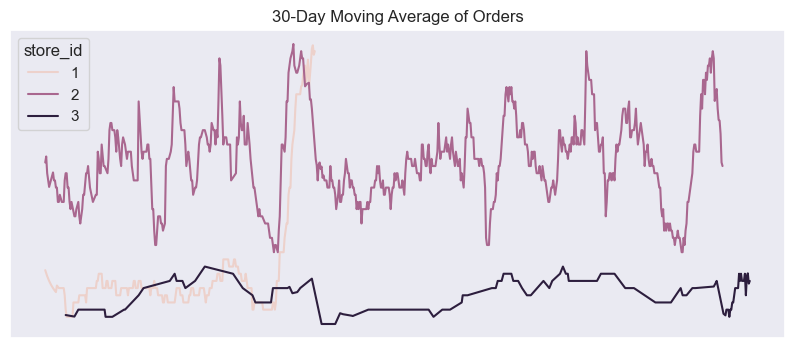

In [36]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=df, x='order_date', y='moving_avg_30d', hue='store_id', ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('30-Day Moving Average of Orders')
plt.show()

## Efficient Query Design
Efficient query design is crucial for optimizing the performance of your SQL queries and ensuring that they run quickly and smoothly.

1. **Use Selectively and Specifically:**
   Only select the columns you need in your result set. Avoid using `SELECT *` when possible, as fetching unnecessary columns can lead to increased data transfer and processing overhead.

2. **Avoid Using Functions in WHERE Clauses:**
   Applying functions to columns in the `WHERE` clause can prevent the use of indexes. Try to structure your queries so that indexed columns are used as they are.

3. **Use Joins Efficiently:**
   Use appropriate join types (`INNER`, `LEFT`, `RIGHT`, `OUTER`) based on your data relationships. Be mindful of cartesian products (cross joins), which can lead to a large number of rows. Properly join tables based on primary and foreign keys.

4. **Limit Subqueries and Correlated Subqueries:**
   Minimize the use of subqueries and correlated subqueries in the `SELECT` list or `WHERE` clause. Instead, use joins whenever possible, as they tend to be more efficient.

5. **Use Window Functions for Analytical Calculations:**
   For calculations involving row-level comparisons or aggregates, consider using window functions (such as `SUM()`, `ROW_NUMBER()`, `LAG()`) instead of self-joins or subqueries.

6. **Avoid Using DISTINCT Unnecessarily:**
   Using `DISTINCT` can introduce additional processing overhead. If possible, structure your queries and joins to avoid duplicates rather than relying on `DISTINCT`.

7. **Limit the Use of ORDER BY:**
   If you don't need a specific order, avoid using `ORDER BY`. Sorting results can be resource-intensive, and omitting `ORDER BY` when not needed can speed up query execution.

8. **Utilize GROUP BY and Aggregation Judiciously:**
   Use `GROUP BY` and aggregation functions (such as `SUM()`, `AVG()`) for summarizing data. Be aware that grouping large datasets can impact performance, so consider using appropriate filters to limit the data.

9. **Use EXPLAIN and Query Optimization Tools:**
    Many databases offer tools like `EXPLAIN` to analyze query execution plans. These tools provide insights into how the database engine processes your queries and help you identify bottlenecks and areas for optimization.

10. **Test and Benchmark:**
    Always test your queries with realistic data volumes to ensure they perform well. Use query benchmarking tools to compare the performance of different query variations.

# Practical Examples

**Customer Segmentation**

Query to segment customers based on order count, total spent, and recency:

In [29]:
query = """

    SELECT
        customer_id,
        SUM(quantity * list_price * (1 - discount)) AS total_spent,
        COUNT(DISTINCT orders.order_id) AS total_orders,
        julianday('2018-12-29') - julianday(MAX(order_date)) AS days_since_last_purchase
    FROM
        orders
    INNER JOIN
        order_items
    ON
        orders.order_id = order_items.order_id
    GROUP BY
        1"""

In [30]:
df = pd.read_sql_query(query, connection)
df

,customer_id,total_spent,total_orders,days_since_last_purchase
0,1,27888.1834,3,41.0
1,2,19329.0849,3,264.0
2,3,24051.5279,3,69.0
3,4,21150.8927,3,255.0
4,5,17520.2919,3,256.0
...,...,...,...,...
1440,1441,9173.3817,1,337.0
1441,1442,6987.2487,1,517.0
1442,1443,10372.0934,1,774.0
1443,1444,1399.9760,1,739.0


In [31]:
df.total_spent.max()

34807.93919999999

In [33]:
9173/34807

0.26353894331599964

In [8]:
query = """
WITH customer_stats AS (
    SELECT
        customer_id,
        SUM(quantity * list_price * (1 - discount)) AS total_spent,
        COUNT(DISTINCT orders.order_id) AS total_orders,
        julianday('2018-12-29') - julianday(MAX(order_date)) AS days_since_last_purchase
    FROM
        orders
    INNER JOIN
        order_items
    ON
        orders.order_id = order_items.order_id
    GROUP BY
        1)

SELECT
    customer_id,
    
    CASE WHEN total_orders > 1 THEN 'repeat buyer'
         ELSE 'one-time buyer'
         END AS purchase_frequency,
    CASE WHEN days_since_last_purchase < 90 THEN 'recent buyer'
         ELSE 'not recent buyer'
         END AS purchase_recency,
         
    CASE WHEN total_spent/(SELECT MAX(total_spent) FROM customer_stats) >= .70 THEN 'big spender'
         WHEN total_spent/(SELECT MAX(total_spent) FROM customer_stats) <= .30 THEN 'low spender'
         ELSE 'average spender' 
         END AS buying_power
FROM
    customer_stats
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,purchase_frequency,purchase_recency,buying_power
0,1,repeat buyer,recent buyer,big spender
1,2,repeat buyer,not recent buyer,average spender
2,3,repeat buyer,recent buyer,average spender
3,4,repeat buyer,not recent buyer,average spender
4,5,repeat buyer,not recent buyer,average spender
...,...,...,...,...
1440,1441,one-time buyer,not recent buyer,low spender
1441,1442,one-time buyer,not recent buyer,low spender
1442,1443,one-time buyer,not recent buyer,low spender
1443,1444,one-time buyer,not recent buyer,low spender


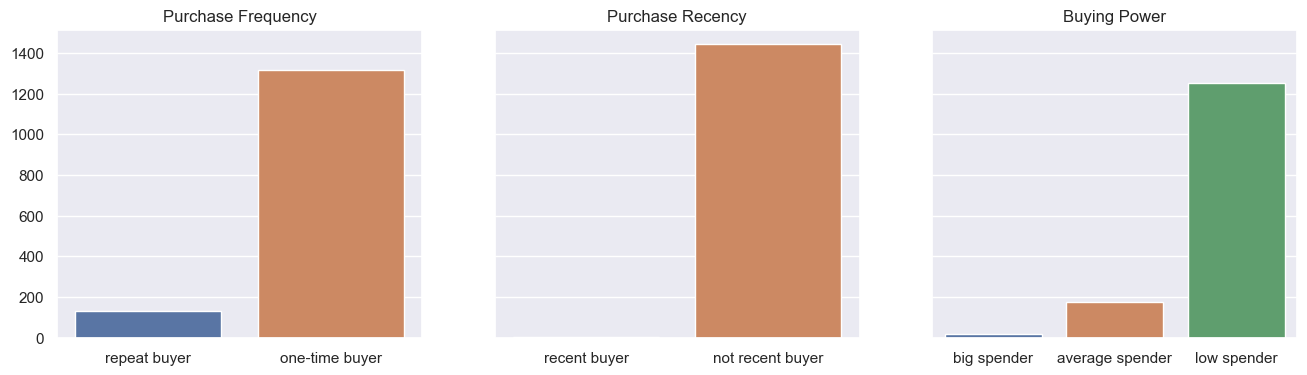

In [38]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4), sharey=True)
sns.countplot(data=df, x='purchase_frequency', ax=ax[0])
sns.countplot(data=df, x='purchase_recency', ax=ax[1])
sns.countplot(data=df, x='buying_power', ax=ax[2])
ax[0].set_title('Purchase Frequency')
ax[1].set_title('Purchase Recency')
ax[2].set_title('Buying Power')
for axis in ax:
    axis.set_ylabel('')
    axis.set_xlabel('')
plt.show()